In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 4

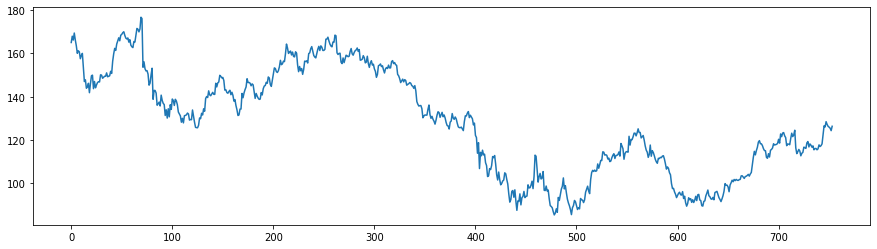

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/EraylsonGaldino/dataset_time_series/master/goldman.txt', header=None)
plt.plot(data)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

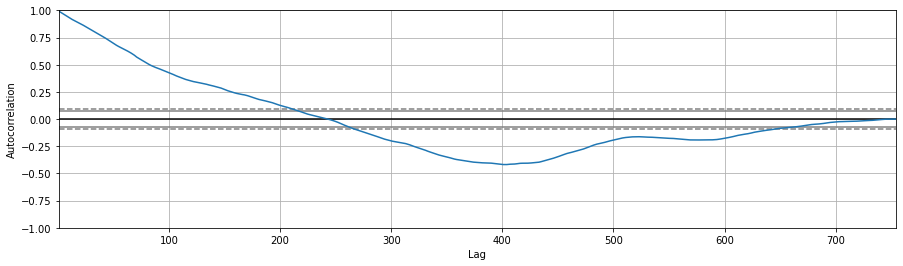

In [5]:
autocorrelation_plot(data)

In [3]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit()

# print(model_fit.summary())

yhat = model_fit.predict(len(data), len(data))
print(yhat)

754    126.119736
dtype: float64


In [74]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)

yhat = model_fit.predict(len(data), len(data))
print(yhat)

754    126.087054
dtype: float64


In [18]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(data)
model_fit = model.fit()

yhat = model_fit.predict(len(data), len(data))
print(yhat)

754    126.134017
dtype: float64


In [4]:
X = data[0].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=88.526249, expected=89.620000
predicted=89.666338, expected=91.980000
predicted=91.825920, expected=91.360000
predicted=91.528623, expected=89.520000
predicted=89.455902, expected=87.790000
predicted=87.929833, expected=88.660000
predicted=88.492451, expected=88.090000
predicted=88.268269, expected=92.890000
predicted=92.496600, expected=92.290000
predicted=92.673893, expected=92.130000
predicted=91.792743, expected=91.000000
predicted=91.359331, expected=92.240000
predicted=91.854935, expected=95.790000
predicted=95.962775, expected=97.180000
predicted=96.957657, expected=98.590000
predicted=98.722896, expected=96.400000
predicted=96.385219, expected=95.150000
predicted=95.223309, expected=101.610000
predicted=101.238850, expected=104.890000
predicted=105.069996, expected=105.930000
predicted=105.719109, expected=105.390000
predicted=105.605770, expected=106.050000
predicted=105.824223, expected=105.470000
predicted=105.701155, expected=105.750000
predicted=105.527917, expec

predicted=118.329456, expected=117.650000
predicted=117.587890, expected=117.790000
predicted=117.839138, expected=117.960000
predicted=117.908031, expected=118.410000
predicted=118.435597, expected=120.290000
predicted=120.179580, expected=118.520000
predicted=118.701369, expected=122.760000
predicted=122.397314, expected=121.500000
predicted=121.886056, expected=123.180000
predicted=122.751842, expected=123.400000
predicted=123.771921, expected=121.900000
predicted=121.639608, expected=121.060000
predicted=121.333180, expected=117.340000
predicted=117.271379, expected=118.100000
predicted=118.125182, expected=118.050000
predicted=118.029864, expected=117.770000
predicted=117.801323, expected=120.680000
predicted=120.515418, expected=123.110000
predicted=123.144522, expected=121.530000
predicted=121.573162, expected=122.350000
predicted=122.272544, expected=124.490000
predicted=124.458871, expected=116.330000
predicted=116.730921, expected=113.660000
predicted=113.424697, expected=114

In [5]:
mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('Test MAE: %.3f' % mae)
print('Test MSE: %.3f' % mse)
print('Test RMSE: %.3f' % rmse)

Test MAE: 1.466
Test MSE: 3.772
Test RMSE: 1.942


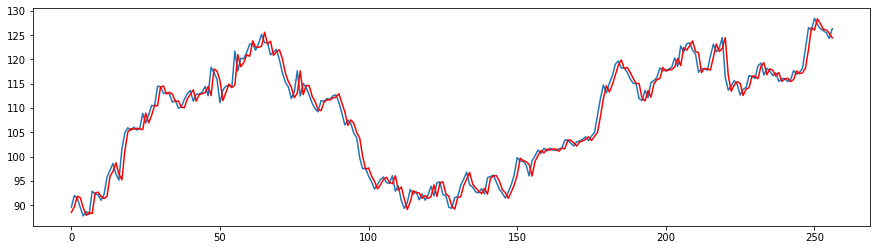

In [6]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

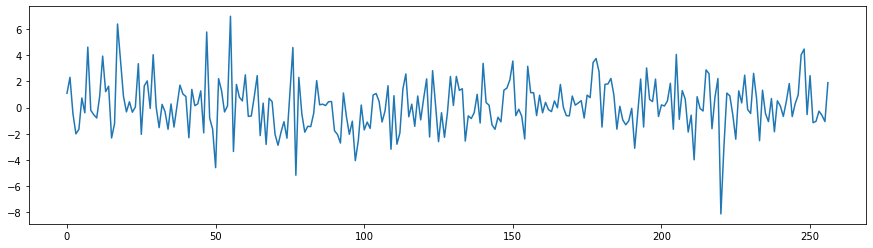

In [10]:
residuo = test - predictions
plt.plot(residuo)

In [43]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tools.eval_measures import rmse


split_point = int(5/6 * len(data))
y_train, y_val = data[:split_point], data[split_point:]


model = SimpleExpSmoothing(y_train)
model_fit = model.fit()

# print(model_fit.summary())

yhat = model_fit.forecast(len(y_val))

mse = mean_squared_error(y_val, yhat)
rmse = sqrt(mse)

# print(yhat)
# model_fit.fittedvalues
# model_fit.resid
# plt.plot(yhat)
# plt.plot(model_fit.resid)
print(rmse)

21.88492604630349


In [62]:
df = pd.DataFrame(data)
df = pd.concat([df.shift(1), df], axis=1)
df.fillna(-1, inplace=True)

values = df.values
X, y = values, values[:, 0]

In [68]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=len(X) - split_point)

nn = MLPRegressor(hidden_layer_sizes=(2,), activation='logistic', solver='lbfgs', shuffle=False)

nn.fit(X_train, Y_train)

MLPRegressor(activation='logistic', hidden_layer_sizes=(2,), shuffle=False,
             solver='lbfgs')

In [69]:
pred_test = nn.predict(X_test)

mse = mean_squared_error(Y_test, pred_test)
rmse = sqrt(mse)

print(rmse)

24.17608919671621


In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X, y, epochs=200, verbose=1)

ModuleNotFoundError: No module named 'tensorflow'